## Project - Computer Vision - Convolutional Neural Networks

### Image classification of Plant Seedlings and Weeds using CNNs in Keras


### Data Description:
- You are provided with a dataset of images of plant seedlings at various stages of grown. Each image has a filename that is its 
unique id. The da
taset comprises 12 plant species. The goal of the project is to create a classifier capable of determining a plant's 
species from a photo.
### Dataset: 
The data file names are:
 images.npy
 Label.csv
- The original files are from Kaggle. Due to the large volume of data, the images were converted to images.npy file and the labels 
are also put into the Labels.csv.

### Context:
Can you differentiate a weed from a crop seedling?
The ability to do so effectively can mean better crop yields and better stewardship of the environment.
The Aarhus University Signal Processing group, in collaboration with University of Southern Denmark, has 
recently released a dataset containing images of unique plants belonging to 12 species at several growth stages
Objective:
To implement the techniques learnt as a part of the course.
### Learning Outcomes:
- Pre-processing of image data.
- Visualization of images.
- Building CNN.
- Evaluate the Model.

 The motive of the project is to make the learners capable to handle images/image classification problems, during this 
process you should also be capable to handle real image files, not just limited to a numpy array of image pixels.
Guide to solve the project seamlessly:
Here are the points which will help you to solve the problem efficiently:
- Read the problem statement carefully from start to end (including the note at the end). The highlighted part in the 
attached problem statement should not be missed.
- Download the dataset from the Olympus platform.
- Upload the "images.npy" and “Labels.csv” file to google drive.
- Then you can use the dataset path in the Google Colab notebook to do further steps related to project problem 
statement.
- You can set runtime type to “GPU” in Google Colab, so that the code will run faster as you will be using CNN to fit your 
model.
Steps and tasks:
1. Import the libraries, load dataset, print shape of data, visualize the images in dataset. (5 Marks)
2. Data Pre-processing: (15 Marks)
a. Normalization.
b. Gaussian Blurring.
c. Visualize data after pre-processing.
3. Make data compatible: (10 Marks)
a. Convert labels to one-hot-vectors.
b. Print the label for y_train[0].
c. Split the dataset into training, testing, and validation set.
(Hint: First split images and labels into training and testing set with test_size = 0.3. Then further split test data 
into test and validation set with test_size = 0.5)
d. Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already. If it’s 
already in the compatible shape, then comment in the notebook that it’s already in compatible shape.
4. Building CNN: (15 Marks)
a. Define layers.
b. Set optimizer and loss function. (Use Adam optimizer and categorical crossentropy.)
5. Fit and evaluate model and print confusion matrix. (10 Marks)
6. Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. (5 Marks)



## Importing Libraries

In [458]:
################################################################################
# Project: Convolutional Neural Networks - Image Classification               ##
# Plants image classification                                                 ##
# Submitted by "Bindu S Pillai"                                               ##
# AIML PG Program condcuted by University of Texas, Austin. Dated - 7/9/2021  ##
################################################################################
# library for creating data paths
import os

# library for randonly selecting data points
import random

# library for performing numerical computations
import numpy as np
import pandas as pd
np.random.seed(1)

# library for creating and showing plots
import matplotlib.pyplot as plt

# library for reading and showing images
import matplotlib.image as mpimg

#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

# importing all the required sub-modules from keras
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, load_img
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

## Mount Google Drive and load datset

In [459]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [460]:
y_data=pd.read_csv('gdrive/My Drive/Colab Notebooks/Labels.csv')

In [461]:
data=np.load('gdrive/My Drive/Colab Notebooks/images.npy')

In [462]:
print(y_data)

                          Label
0     Small-flowered Cranesbill
1     Small-flowered Cranesbill
2     Small-flowered Cranesbill
3     Small-flowered Cranesbill
4     Small-flowered Cranesbill
...                         ...
4745           Loose Silky-bent
4746           Loose Silky-bent
4747           Loose Silky-bent
4748           Loose Silky-bent
4749           Loose Silky-bent

[4750 rows x 1 columns]


- Finding out how many images are there for each type of plant seedlings.

In [463]:
y_data.value_counts()

Label                    
Loose Silky-bent             654
Common Chickweed             611
Scentless Mayweed            516
Small-flowered Cranesbill    496
Fat Hen                      475
Charlock                     390
Sugar beet                   385
Cleavers                     287
Black-grass                  263
Shepherds Purse              231
Maize                        221
Common wheat                 221
dtype: int64

- Looking at image data. 3 dimensional arrays stored in the numpy variable.

In [464]:
print(data)

[[[[ 35  52  78]
   [ 36  49  76]
   [ 31  45  69]
   ...
   [ 78  95 114]
   [ 76  93 110]
   [ 80  95 109]]

  [[ 33  46  68]
   [ 37  50  73]
   [ 48  65  83]
   ...
   [ 81  96 113]
   [ 74  89 105]
   [ 83  95 109]]

  [[ 34  50  68]
   [ 35  52  72]
   [ 70  85 101]
   ...
   [ 83  97 112]
   [ 79  94 108]
   [ 79  94 107]]

  ...

  [[ 35  50  69]
   [ 42  57  73]
   [ 42  57  72]
   ...
   [ 60  76  92]
   [ 67  81  97]
   [ 64  77  95]]

  [[ 36  52  67]
   [ 48  63  78]
   [ 41  57  73]
   ...
   [ 44  66  83]
   [ 58  76  91]
   [ 57  74  90]]

  [[ 44  58  70]
   [ 43  57  73]
   [ 40  55  72]
   ...
   [ 41  70  92]
   [ 55  78  97]
   [ 61  79  96]]]


 [[[ 30  47  63]
   [ 30  50  60]
   [ 34  47  63]
   ...
   [ 48  59  74]
   [ 42  54  69]
   [ 44  56  70]]

  [[ 30  49  67]
   [ 26  47  60]
   [ 30  40  61]
   ...
   [ 50  64  76]
   [ 52  67  78]
   [ 45  56  72]]

  [[ 23  46  65]
   [ 27  48  64]
   [ 25  40  59]
   ...
   [ 39  59  81]
   [ 47  62  79]
   [ 42  54

## Print shape of data 

In [465]:
# Shape of the image data
data.shape

(4750, 128, 128, 3)

- There are 4750 images of size 128 by 128 and 3 channels(RGB). Hence they are color images

In [466]:
y_data.shape

(4750, 1)

- There are 4750 labels corresponding to the images likewise.

In [467]:
y= y_data['Label']

In [468]:
y.shape

(4750,)

- Displaying some labels

In [469]:
print(y[0])
print(y[1000])

Small-flowered Cranesbill
Shepherds Purse


In [470]:
# Converting labels data, y to numpy array.
y = y.values

#### Visualize the images

- Displaying some iamges from the dataset 

Label: Small-flowered Cranesbill


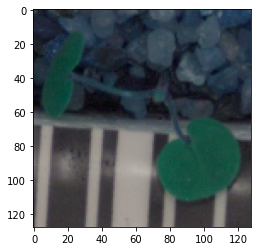

In [471]:
import matplotlib.pyplot as plt
%matplotlib inline
print("Label: {}".format(y[10]))
plt.imshow(data[10])

Label: Small-flowered Cranesbill


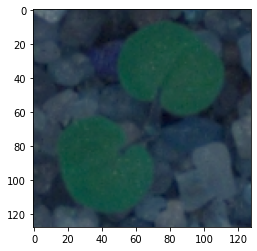

In [472]:
print("Label: {}".format(y[200]))
plt.imshow(data[200])

Label: Fat Hen


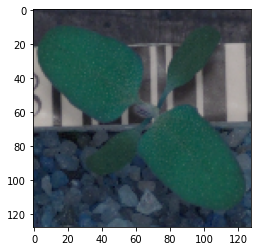

In [473]:
print("Label: {}".format(y[500]))
plt.imshow(data[500])

Label: Shepherds Purse


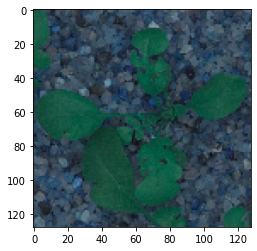

In [474]:
print("Label: {}".format(y[1000]))
plt.imshow(data[1000],cmap= 'gray')

Label: Common Chickweed


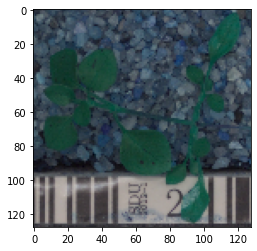

In [475]:
print("Label: {}".format(y[1500]))
plt.imshow(data[1500])

In [476]:
# Import necessary libraries.
import cv2
from google.colab.patches import cv2_imshow

- Sample Image visualize before and after Gaussian blurring 

Original Image:



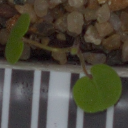


 Output after first gaussian blurring: 



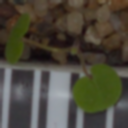


 Output after second gaussian blurring: 



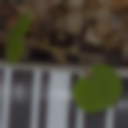

In [477]:
Gaussian1 = cv2.GaussianBlur(data[10], (5, 5), 0)
Gaussian2 = cv2.GaussianBlur(data[10], (15, 15), 0)
print('Original Image:\n')
cv2_imshow(data[10])
print('\n Output after first gaussian blurring: \n')
cv2_imshow(Gaussian1)
print('\n Output after second gaussian blurring: \n')
cv2_imshow(Gaussian2)

### One hot-encoding of labels

In [478]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
y=pd.get_dummies(y_data)

In [479]:
pd. set_option("display.max_columns", None)
y.head()

,Label_Black-grass,Label_Charlock,Label_Cleavers,Label_Common Chickweed,Label_Common wheat,Label_Fat Hen,Label_Loose Silky-bent,Label_Maize,Label_Scentless Mayweed,Label_Shepherds Purse,Label_Small-flowered Cranesbill,Label_Sugar beet
0,0,0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,1,0


In [480]:
y_labels =  { 0 : 'Black-grass', 1 : 'Charlock', 2 : 'Cleavers', 3 : 'Common Chickweed', 4 : 'Common wheat', 5 : 'Fat Hen', 6 : 'Loose Silky-bent', 7 :  'Maize', 
 8 : 'Scentless Mayweed', 9 : 'Shepherds Purse', 10 : 'Small-flowered Cranesbill', 11 : 'Sugar beet'}

In [481]:
y_labels

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [482]:
y_data.iloc[0]

Label    Small-flowered Cranesbill
Name: 0, dtype: object

In [483]:
#Selecting all columns of the encoded vector
y=y[:]

In [484]:
type(y)

pandas.core.frame.DataFrame

In [485]:
#Converting to numpy array.
y=y.values

In [486]:
# Checking data type again
type(y)

numpy.ndarray

In [487]:
type(data)

numpy.ndarray

In [488]:
y

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [489]:
y[0]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0], dtype=uint8)

## Gaussian Blurring

In [490]:
# Making a copy of images data to apply Gaussian blurring.
data1=data

In [491]:
# Now we apply the gaussian blur to each 128x128 pixels array (image) to reduce the noise in the image
for idx, img in enumerate(data1):
  data1[idx] = cv2.GaussianBlur(img, (5, 5), 0)

## Split the dataset into training , testing and validation set

In [492]:
# Train Test split using Gaussian blurred data
X_train, X_test, y_train, y_test = train_test_split(data1, y, train_size=0.70, random_state=5)

In [493]:
#split test and validation using Gaussian blurred data
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state = 5)

In [494]:
# Train test split using original data (not blurred)
X1_train, X1_test, y1_train, y1_test = train_test_split(data, y, train_size=0.70, random_state=5)

In [495]:
#split test and validation using original data (not blurred)
X1_test, X1_val, y1_test, y1_val = train_test_split(X1_test, y1_test, test_size = 0.5, random_state = 1)

### Normalize data

In [496]:
# Normalize the Gaussian blurred data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_val = X_val.astype('float32') / 255.0

In [497]:
# Normalize the original data
X1_train = X1_train.astype('float32') / 255.0
X1_test = X1_test.astype('float32') / 255.0
X1_val = X1_val.astype('float32') / 255.0

### Check the shape of data, Reshape data into shapes compatible with Keras models if it’s not already.

In [498]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [499]:
print(X1_train.shape)
print(X1_test.shape)
print(X1_val.shape)

(3325, 128, 128, 3)
(712, 128, 128, 3)
(713, 128, 128, 3)


In [500]:
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(3325, 12)
(712, 12)
(713, 12)


In [501]:
print(y1_train.shape)
print(y1_test.shape)
print(y1_val.shape)

(3325, 12)
(712, 12)
(713, 12)


##This data is already in compatible shape to be used with CNN models. We can use 3 dimensional arrays indicating color images as input to the model. In this case the arrays are of size 128,128,3.

### Visualize data after preprocessing

In [502]:
y_labels

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

Label: [0 1 0 0 0 0 0 0 0 0 0 0]


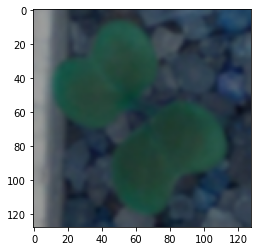

In [503]:
print("Label: {}".format(y_train[1500]))
plt.imshow(X_train[1500])

- From Label Array and looking at y_labels. This is a charlock.

Label: [0 0 0 1 0 0 0 0 0 0 0 0]


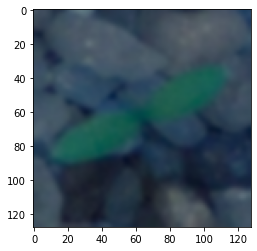

In [504]:
print("Label: {}".format(y_train[300]))
plt.imshow(X_train[300])

- From Label Array and looking at y_labels. This is a 'Common Chickweed'.

Label: [0 0 0 0 0 0 1 0 0 0 0 0]


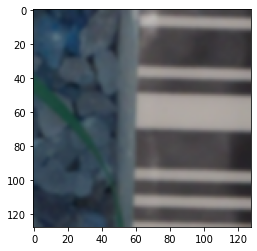

In [505]:
print("Label: {}".format(y_train[0]))
plt.imshow(X_train[0])

- From Label Array and looking at y_labels. This is a 'Loose Silky-bent'.

Label: [0 0 1 0 0 0 0 0 0 0 0 0]


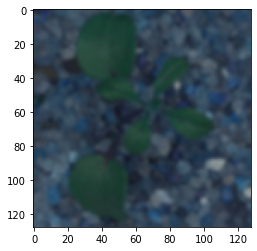

In [506]:
print("Label: {}".format(y_train[3000]))
plt.imshow(X_train[3000])

## Print Label for Y_train[0]*

In [507]:
print(y_train[0])

[0 0 0 0 0 0 1 0 0 0 0 0]


- From Label Array and looking at y_labels. This is a 'Cleavers'.

## Augmenting data to reduce overfitting

In [508]:
from keras.preprocessing.image import ImageDataGenerator

data_generator = ImageDataGenerator(rotation_range=20,
                                    zoom_range=0.2,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    vertical_flip=True,
    )
data_generator.fit(X_train)
data_generator.fit(X1_train)

##Building CNN - Define layers of CNN, Batch Normalization, max pooling, Dropout and Dense layer(Fully Connected Network)

In [509]:
#@title Model 1
# Set the CNN model

#initialize the model
batch_size = None
model = models.Sequential()

#This adds the input layer (by specifying input dimension) AND the first hidden layer (CNN)
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128,128,3)))
#This standardizes the inputs to a layer for each mini-batch.
model.add(layers.BatchNormalization())
#Adding maxpooling to reduce dimensionality
model.add(layers.MaxPooling2D((2, 2)))
#Adding Dropout to prevent overfitting
model.add(layers.Dropout(0.2))
#Repeat the above steps again
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

#Flattening the input for dense layer
model.add(layers.GlobalMaxPooling2D())

#Create fully connected layers with 512 units
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

#Create fully connected layers with 512 units
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
#Add output layer
model.add(layers.Dense(12, activation="softmax"))
#List Model parameters
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_32 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_45 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_33 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 32, 32, 64)       

###Setting loss function via early stopping and model checkpoint parameters

In [510]:

#Adding Early stopping callback to the fit function is going to stop the training,
#if the val_loss is not going to change even '0.001' for more than 10 continous epochs
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=10)

#Adding Model Checkpoint callback to the fit function is going to save the weights whenever val_loss achieves a new low value. 
#Hence saving the best weights occurred during training

model_checkpoint =  ModelCheckpoint('cifar_cnn_checkpoint_{epoch:02d}_loss{val_loss:.4f}.h5',
                                                           monitor='val_loss',
                                                           verbose=1,
                                                           save_best_only=True,
                                                           save_weights_only=True,
                                                           mode='auto'
                                                          )

#### Setting optimizer batch function etc. 

In [511]:
# Set the batch size, number of epochs.
batch_size = 64
num_classes = 10
epochs = 100
num_predictions = 20

In [512]:
# initiate Adam optimizer
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

In [513]:
# Let's tcompile the model by providing parameters
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Let's fit the model using data that was NOT BLURRED using Gaussing blurring.

Epoch 1/100
52/52 [==============================] - 3s 38ms/step - loss: 3.5249 - accuracy: 0.1338 - val_loss: 2.4646 - val_accuracy: 0.1304

Epoch 00001: val_loss improved from inf to 2.46464, saving model to cifar_cnn_checkpoint_01_loss2.4646.h5
Epoch 2/100
52/52 [==============================] - 2s 34ms/step - loss: 2.2298 - accuracy: 0.2418 - val_loss: 2.5823 - val_accuracy: 0.1304

Epoch 00002: val_loss did not improve from 2.46464
Epoch 3/100
52/52 [==============================] - 2s 34ms/step - loss: 1.9344 - accuracy: 0.3167 - val_loss: 3.0957 - val_accuracy: 0.1304

Epoch 00003: val_loss did not improve from 2.46464
Epoch 4/100
52/52 [==============================] - 2s 34ms/step - loss: 1.7102 - accuracy: 0.3928 - val_loss: 3.9889 - val_accuracy: 0.1304

Epoch 00004: val_loss did not improve from 2.46464
Epoch 5/100
52/52 [==============================] - 2s 35ms/step - loss: 1.5925 - accuracy: 0.4415 - val_loss: 4.1598 - val_accuracy: 0.1304

Epoch 00005: val_loss did 

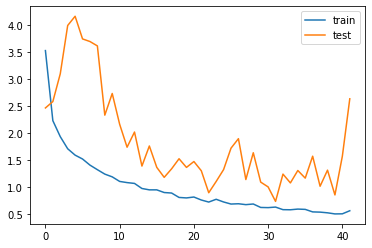

In [514]:
#Fit Model using train data and save history of each epochs
history = model.fit(X1_train,
                    y1_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X1_val,y1_val),
                    #shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

<h2>Model Score:<h2/>

- Once the model is fit, we evaluate it on the test dataset and print out the classification accuracy

In [515]:
# Score trained model.
scores = model.evaluate(X1_test, y1_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 2.5961 - accuracy: 0.3736
Test loss: 2.5960562229156494
Test accuracy: 0.3735955059528351


- Test accuracy is very bad. We have to try and tune themodel and also try useing gaussian blurred data

### Print Confusion Matrix

In [516]:
from sklearn.metrics import classification_report, confusion_matrix

In [517]:
# Find the prdicted labels by the model
predicted_prob = model.predict(X1_test)
y1_pred = predicted_prob.argmax(axis=1)

In [518]:
#Display model predictions
y1_pred

array([ 5,  8,  6,  8,  3,  8,  8,  3,  6,  8,  8,  6,  8,  8,  0,  8,  3,
        8,  8,  6,  8,  7,  8,  6,  6,  8,  8,  7,  8,  6,  6,  3,  8,  7,
        6,  8,  8,  6,  3,  8,  8,  3,  3,  5,  8,  6,  8,  3,  4,  6,  6,
        6,  6,  6,  8,  6,  8,  6,  8,  4,  8,  8,  8,  8,  8,  8,  8,  8,
        6,  8,  6,  8,  8,  8,  6,  0,  6,  6,  8,  8,  6,  6,  8,  8,  4,
        8,  6,  8,  8,  4,  5,  8,  3,  8,  6,  6,  6,  8,  8,  8,  3,  8,
        8,  4,  8,  6,  8,  8,  7,  6,  8,  8,  8,  6,  6,  3,  6,  6,  8,
        8,  8,  6,  0,  8,  3,  5,  8,  9,  5,  6,  6,  8,  8,  6,  4,  0,
        3,  6,  8,  8,  8,  3,  6,  6,  8,  8,  6,  8,  4,  8,  8,  8,  8,
        8,  8,  3,  8,  3,  6,  8,  6,  6,  6,  6,  3,  6,  8,  3,  3,  8,
        3,  6,  6,  6,  9,  3,  6,  3,  6,  7,  8,  8,  9,  8,  6,  8,  8,
        8,  8,  8,  6,  8,  8,  8,  3,  8,  8,  8,  8,  8,  8,  6,  8,  8,
        6,  6,  3,  4,  7,  6,  4,  0,  3, 11,  8,  6,  8,  3,  8,  8,  8,
        3,  8,  8,  6,  8

In [519]:
#Actual labels
y1_test_final = y1_test.argmax(axis=1)

In [520]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y1_test_final, y1_pred)
print(cm)

=== Confusion Matrix ===
[[ 0  0  0  0  0  0 32  0  0  0  0  0]
 [ 0  0  0  0  0  2  1  1 60  0  0  1]
 [ 4  0  0  0 16  2  5  3 22  0  0  0]
 [ 0  0  0 66  0  0  5  1 34  1  0  0]
 [ 3  0  0  0 13  0 14  2  0  0  0  0]
 [ 1  0  0  1  0 11 27  0 37  0  0  0]
 [ 2  0  0  0  0  0 88  0  2  0  0  0]
 [ 0  0  0  0  0  0  2 11 14  2  0  0]
 [ 0  0  0  0  0  0  2  0 74  0  0  0]
 [ 0  0  0  0  0  0  4  0 30  3  0  0]
 [ 0  0  0  0  0  1  1  1 62  0  0  0]
 [ 0  0  0  2  0  0  0  0 46  0  0  0]]


### Heat Map for better Visualization of confusion Matrix

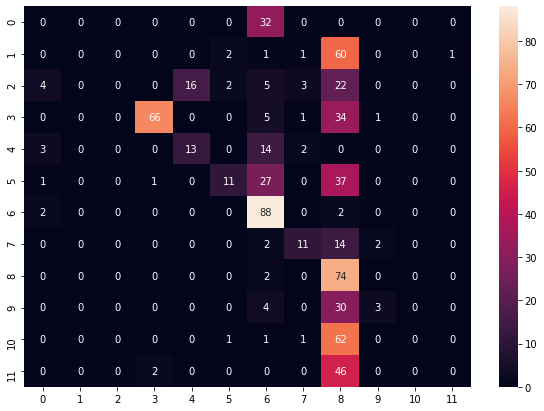

In [521]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in np.arange(12)],
                     columns = [i for i in np.arange(12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

## As the test accuracy is not looking great in the above model using non-blurred data. Let's try fitting the model using Gaussian blurred data

Epoch 1/100
52/52 [==============================] - 2s 36ms/step - loss: 0.4973 - accuracy: 0.8277 - val_loss: 0.9851 - val_accuracy: 0.6928

Epoch 00001: val_loss did not improve from 0.73731
Epoch 2/100
52/52 [==============================] - 2s 34ms/step - loss: 0.4698 - accuracy: 0.8442 - val_loss: 0.8659 - val_accuracy: 0.7265

Epoch 00002: val_loss did not improve from 0.73731
Epoch 3/100
52/52 [==============================] - 2s 34ms/step - loss: 0.5022 - accuracy: 0.8301 - val_loss: 2.3739 - val_accuracy: 0.3058

Epoch 00003: val_loss did not improve from 0.73731
Epoch 4/100
52/52 [==============================] - 2s 34ms/step - loss: 0.4987 - accuracy: 0.8295 - val_loss: 0.9729 - val_accuracy: 0.6858

Epoch 00004: val_loss did not improve from 0.73731
Epoch 5/100
52/52 [==============================] - 2s 34ms/step - loss: 0.4600 - accuracy: 0.8421 - val_loss: 0.5852 - val_accuracy: 0.8247

Epoch 00005: val_loss improved from 0.73731 to 0.58522, saving model to cifar_cnn

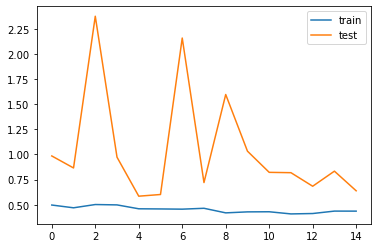

In [522]:
#Fit Model using train data and save history of each epochs
history = model.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val,y_val),
                    #shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate the scores for the model.

In [523]:
# Score trained model.
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 7ms/step - loss: 0.6094 - accuracy: 0.8160
Test loss: 0.6093722581863403
Test accuracy: 0.8160112500190735


- The score is looking a lot better with Gaussian-blurred data in the above model.

### Print Confusion Matrix

In [524]:
from sklearn.metrics import classification_report, confusion_matrix

In [525]:
# Find the prdicted labels by the model
predicted_prob = model.predict(X_test)
y_pred = predicted_prob.argmax(axis=1)

In [526]:
#Display model predictions
y_pred

array([ 9,  1,  5, 11, 10,  6, 10,  6,  1, 10,  8,  8, 10, 10,  3,  5,  5,
        0,  1,  3,  4,  5,  3,  4,  6,  6,  1,  7, 10,  2,  5,  3,  6, 10,
       11,  2,  3,  2, 10,  6,  8,  9,  8,  6,  2, 10, 10,  0,  9,  0,  6,
        8, 10,  9,  8,  5,  4,  7,  3,  8,  8,  3,  8, 10,  6,  4,  8, 10,
        7,  8,  8,  6,  4,  8,  6,  0,  6,  1,  1,  4,  3, 10,  5, 11,  3,
        9,  8,  5,  9,  4,  8,  7, 10,  1,  2,  5,  0,  3,  5, 11,  4, 10,
        8,  9, 11,  8, 10,  3,  8,  3,  4,  6,  9,  4, 10,  3,  4,  5, 11,
        2,  3,  9,  3,  4,  0, 11,  2,  2,  8,  4,  7, 10,  3,  1,  8,  4,
        3,  3,  8,  5,  5,  1, 10, 10,  3,  6,  6, 11,  6,  2,  3,  8,  5,
        1,  8,  3,  5,  4,  6, 11,  4,  8,  5,  4,  8,  0,  8,  8,  9,  6,
        5, 10,  3,  7,  5,  8,  8,  0, 11, 11,  5,  2,  9,  8,  1,  5,  8,
        6, 10,  5,  6,  3, 11,  3,  6,  2,  4,  8,  3,  6,  3,  2,  6,  0,
        3,  8,  4,  8,  6,  3,  6,  1,  5,  6, 11,  3, 11,  2,  5,  6,  6,
        3,  1,  6,  3,  3

In [527]:
#Actual labels
y_test_final = y_test.argmax(axis=1)

In [528]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_final, y_pred)
print(cm)

=== Confusion Matrix ===
[[16  0  0  0  2  0 19  0  0  0  0  0]
 [ 0 49  9  0  4  1  0  0  3  0  0  0]
 [ 0  0 35  0  6  0  0  0  0  0  3  0]
 [ 0  0  0 81  0  0  1  0 11  1  2  0]
 [ 1  0  0  0 26  0  1  0  0  0  0  0]
 [ 2  0  1  1  6 64  3  0  0  1  0  0]
 [ 6  0  0  0  0  0 81  0  0  0  0  0]
 [ 0  4  0  0  0  0  1 23  1  0  1  1]
 [ 3  0  0  0  1  0  7  0 68  0  0  3]
 [ 0  1  1  1  1  0  0  0 11 20  1  0]
 [ 0  0  1  0  0  0  0  0  3  1 61  0]
 [ 0  1  0  0  2  0  0  0  1  0  0 57]]


### Heat Map for better Visualization of confusion Matrix

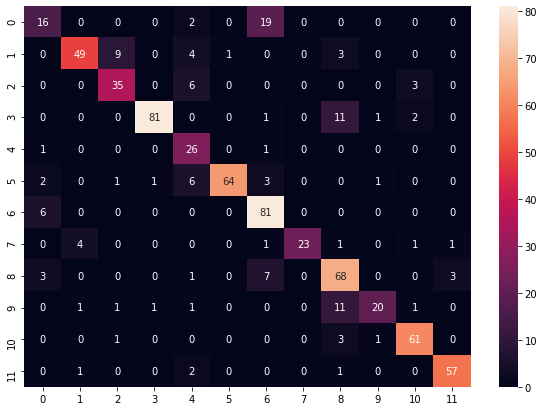

In [529]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in np.arange(12)],
                     columns = [i for i in np.arange(12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59]. 

In [530]:
# Dictionary variable holding the one hot coded labels and actual values
y_labels

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [531]:
#Function to visualize image and print actual and predicted label
def visualize_img(i):
  print("Actual Label in one hot coded array: {}".format(y_test[i]))
  lb_act = y_test_final[i].astype(int)
  lb_pred = y_pred[i].astype(int)
  print("Actual Label: {0} {1}".format(y_test_final[i], y_labels[lb_act]) )
  print("Predicted Label: {0} {1}".format(y_pred[i], y_labels[lb_pred]))
  plt.imshow(X_test[i])


Actual Label in one hot coded array: [0 0 0 0 0 1 0 0 0 0 0 0]
Actual Label: 5 Fat Hen
Predicted Label: 5 Fat Hen


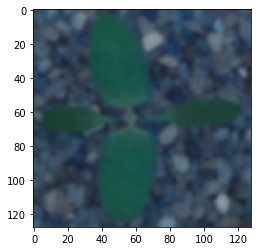

In [532]:
visualize_img(2)

Actual Label in one hot coded array: [0 0 0 0 0 0 0 0 0 0 0 1]
Actual Label: 11 Sugar beet
Predicted Label: 11 Sugar beet


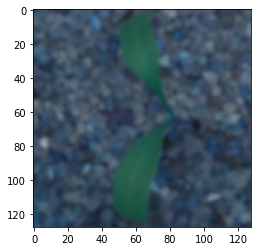

In [533]:
visualize_img(3)

Actual Label in one hot coded array: [0 0 0 0 0 0 0 0 0 0 1 0]
Actual Label: 10 Small-flowered Cranesbill
Predicted Label: 10 Small-flowered Cranesbill


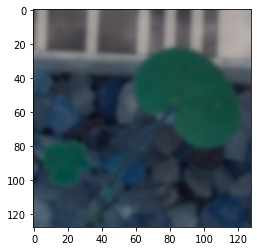

In [534]:
visualize_img(33)

Actual Label in one hot coded array: [0 0 0 1 0 0 0 0 0 0 0 0]
Actual Label: 3 Common Chickweed
Predicted Label: 3 Common Chickweed


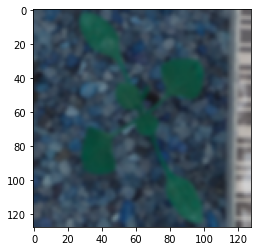

In [535]:
visualize_img(36)

Actual Label in one hot coded array: [0 0 0 0 0 0 0 0 1 0 0 0]
Actual Label: 8 Scentless Mayweed
Predicted Label: 8 Scentless Mayweed


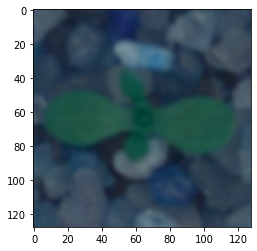

In [536]:
visualize_img(59)

## Let's see if we can improve Test accuracy by using different Hyper Parameters

In [537]:
# Set the CNN model2
batch_size = None
#initialize the model
model2 = models.Sequential()

#This adds the input layer (by specifying input dimension) AND the first hidden layer (CNN)
model2.add(layers.Conv2D(32, (5, 5), padding='same', activation="tanh", input_shape=X_train.shape[1:]))

#This standardizes the inputs to a layer for each mini-batch.
model2.add(layers.BatchNormalization())

#Adding maxpooling to reduce dimensionality
model2.add(layers.MaxPooling2D((2, 2)))

#Adding Dropout to prevent overfitting
model2.add(layers.Dropout(0.2))

#Repeat the above steps again
model2.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.3))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.4))
model2.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model2.add(layers.BatchNormalization())
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Dropout(0.5))

#Flattening the input for dense layer
model2.add(layers.GlobalMaxPooling2D())

#Create fully connected layers with 512 units
model2.add(layers.Dense(512, activation="relu"))

#Create fully connected layers with 256 units
model2.add(layers.Dense(256, activation="relu"))
model2.add(layers.Dropout(0.5))

#Add output layer
model2.add(layers.Dense(12, activation="softmax"))

model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization_36 (Batc (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
dropout_51 (Dropout)         (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_37 (Batc (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 32, 32, 64)       

###Setting Optimizer as Adamax

In [538]:
# initiate Adamax optimizer
opt = optimizers.Adamax(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

## Compile the Model

In [539]:
# Let's compile the model providing parameters
model2.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

### Fit model2, using Gaussian blurred train data.

Epoch 1/100
104/104 [==============================] - 3s 23ms/step - loss: 2.6526 - accuracy: 0.1892 - val_loss: 2.4795 - val_accuracy: 0.1038

Epoch 00001: val_loss did not improve from 0.58522
Epoch 2/100
104/104 [==============================] - 2s 21ms/step - loss: 2.0368 - accuracy: 0.2941 - val_loss: 2.4958 - val_accuracy: 0.1374

Epoch 00002: val_loss did not improve from 0.58522
Epoch 3/100
104/104 [==============================] - 2s 21ms/step - loss: 1.8003 - accuracy: 0.3714 - val_loss: 2.5203 - val_accuracy: 0.1374

Epoch 00003: val_loss did not improve from 0.58522
Epoch 4/100
104/104 [==============================] - 2s 22ms/step - loss: 1.6257 - accuracy: 0.4391 - val_loss: 2.5570 - val_accuracy: 0.0449

Epoch 00004: val_loss did not improve from 0.58522
Epoch 5/100
104/104 [==============================] - 2s 20ms/step - loss: 1.5316 - accuracy: 0.4785 - val_loss: 2.3722 - val_accuracy: 0.0926

Epoch 00005: val_loss did not improve from 0.58522
Epoch 6/100
104/104 

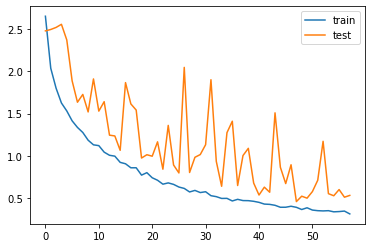

In [540]:
#Fit Model using train data and save history of each epochs
history2 = model2.fit(X_train,
                    y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X_val,y_val),
                    #shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate the scores for model2, using Gaussian blurred data.

In [541]:
# Score trained model.
scores = model2.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 8ms/step - loss: 0.5135 - accuracy: 0.8525
Test loss: 0.5135271549224854
Test accuracy: 0.8525280952453613


- **Test accuracy looks even better for model2 with blurred data**..

### Print Confusion Matrix

In [542]:
# Find the prdicted labels by the model
predicted_prob = model2.predict(X_test)
y_pred = predicted_prob.argmax(axis=1)

In [543]:
y_test_final = y_test.argmax(axis=1)

In [544]:
#Display predictions
y_pred

array([ 8,  1,  5, 11, 10,  0, 11,  0,  1, 10,  8,  8, 10, 10,  3,  5,  5,
        6,  1,  3,  8,  5,  3,  4,  6,  6,  1,  7, 10,  2,  5,  3,  6, 10,
       11,  1,  3,  2, 10,  6,  8,  9,  8,  5,  2, 10, 10,  4,  9,  0,  6,
        8, 10,  9,  8,  5,  4,  7,  3,  8,  8,  3,  8, 10,  8,  4, 11, 10,
        7,  8,  8,  6,  2,  3,  6,  8,  6,  1,  1,  4, 10, 10,  8, 11,  3,
        9,  8,  5,  9,  4,  3,  7, 10,  9,  5,  5,  0,  3,  5, 11,  4, 10,
        8,  9, 11,  8, 10,  3,  8,  3,  4,  6,  9,  4, 10,  3,  8,  5, 11,
        2,  3,  9,  3,  2,  6, 11,  2,  2, 11,  2,  7,  9,  3,  7,  8,  2,
        3,  3,  8,  5, 10,  1, 10,  2,  3,  6,  0, 11,  8,  2,  3,  8,  5,
       11,  9,  3,  5,  4,  8, 11,  4,  8,  5,  4,  8,  6,  3,  8,  8,  6,
        5, 10,  3,  7, 11,  8,  8,  6, 11, 11,  8,  1,  9,  8, 11,  5,  8,
        8,  2,  5,  0,  3, 11,  3,  0,  2,  2,  8,  3,  8,  3,  1,  0,  5,
        3, 10,  1,  8,  6,  3,  6,  1,  5,  6, 11,  3, 11,  2, 11,  6,  6,
        3,  1,  6,  3,  3

In [545]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y_test_final, y_pred)
print(cm)

=== Confusion Matrix ===
[[20  0  0  0  3  0 10  0  3  0  0  1]
 [ 0 59  2  0  0  1  0  0  1  1  0  2]
 [ 0  3 39  0  0  1  0  0  0  0  1  0]
 [ 0  0  0 87  0  0  0  0  3  4  1  1]
 [ 0  0  2  0 19  1  0  0  2  0  0  4]
 [ 1  0  2  0  1 66  0  1  4  1  1  1]
 [12  0  0  0  0  0 69  0  5  0  0  1]
 [ 0  1  0  0  0  0  1 25  0  0  0  4]
 [ 0  1  0  0  0  0  0  0 78  2  0  1]
 [ 0  0  0  0  0  0  0  0 11 25  0  0]
 [ 0  1  1  1  0  0  0  0  0  2 59  2]
 [ 0  0  0  0  0  0  0  0  0  0  0 61]]


### Heat Map for better Visualization of confusion Matrix

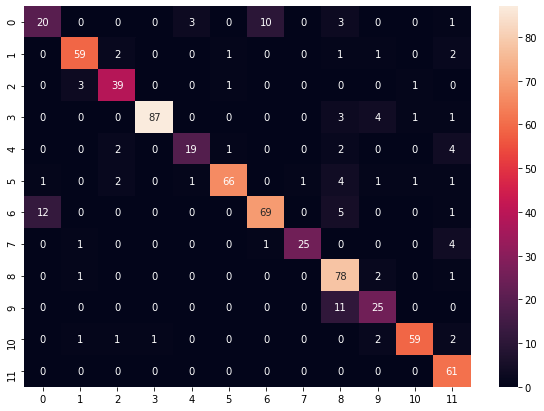

In [546]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in np.arange(12)],
                     columns = [i for i in np.arange(12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

### Fit model2, using train data that is NOT Blurred.

Epoch 1/100
104/104 [==============================] - 2s 21ms/step - loss: 0.3252 - accuracy: 0.8845 - val_loss: 0.6471 - val_accuracy: 0.7868

Epoch 00001: val_loss did not improve from 0.45863
Epoch 2/100
104/104 [==============================] - 2s 20ms/step - loss: 0.3099 - accuracy: 0.8899 - val_loss: 0.6745 - val_accuracy: 0.7574

Epoch 00002: val_loss did not improve from 0.45863
Epoch 3/100
104/104 [==============================] - 2s 21ms/step - loss: 0.3305 - accuracy: 0.8902 - val_loss: 0.8888 - val_accuracy: 0.6844

Epoch 00003: val_loss did not improve from 0.45863
Epoch 4/100
104/104 [==============================] - 2s 20ms/step - loss: 0.3134 - accuracy: 0.8911 - val_loss: 0.3768 - val_accuracy: 0.9046

Epoch 00004: val_loss improved from 0.45863 to 0.37682, saving model to cifar_cnn_checkpoint_04_loss0.3768.h5
Epoch 5/100
104/104 [==============================] - 2s 21ms/step - loss: 0.2943 - accuracy: 0.8962 - val_loss: 1.0091 - val_accuracy: 0.6536

Epoch 00005:

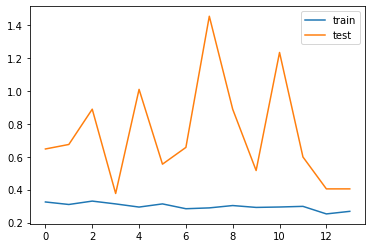

In [547]:
#Fit Model using train data and save history of each epochs
history3 = model2.fit(X1_train,
                    y1_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(X1_val,y1_val),
                    #shuffle=True,
                    verbose=1,
                    callbacks=[early_stopping,model_checkpoint])

# plot training history
plt.plot(history3.history['loss'], label='train')
plt.plot(history3.history['val_loss'], label='test')
plt.legend()
plt.show()

### Evaluate the scores for model2, using data that is not blurred.

In [548]:
# Score trained model.
scores = model2.evaluate(X1_test, y1_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

23/23 [==============================] - 0s 8ms/step - loss: 0.3877 - accuracy: 0.9003
Test loss: 0.3876684308052063
Test accuracy: 0.9002808928489685


- **This model using the unblurred data gives the best accuracy**

## Confusion Matrix

In [549]:
# Find the prdicted labels by the model
predicted_prob = model2.predict(X1_test)
y1_pred = predicted_prob.argmax(axis=1)

In [550]:
y1_test_final = y1_test.argmax(axis=1)

In [551]:
print("=== Confusion Matrix ===")
cm = confusion_matrix(y1_test_final, y1_pred)
print(cm)

=== Confusion Matrix ===
[[  9   0   0   0   0   0  23   0   0   0   0   0]
 [  0  59   2   0   0   2   0   0   0   1   1   0]
 [  0   0  46   0   0   3   0   0   0   0   2   1]
 [  0   0   0 105   0   1   0   0   1   0   0   0]
 [  1   0   0   0  25   2   0   0   0   0   1   3]
 [  0   0   0   0   0  77   0   0   0   0   0   0]
 [  4   0   0   0   0   2  86   0   0   0   0   0]
 [  0   0   0   0   0   0   2  26   0   0   0   1]
 [  0   0   0   0   0   1   1   0  69   5   0   0]
 [  0   0   0   4   0   0   1   0   1  31   0   0]
 [  0   0   0   2   0   1   0   0   0   0  62   0]
 [  0   0   0   2   0   0   0   0   0   0   0  46]]


### Heat Map for better Visualization of confusion Matrix

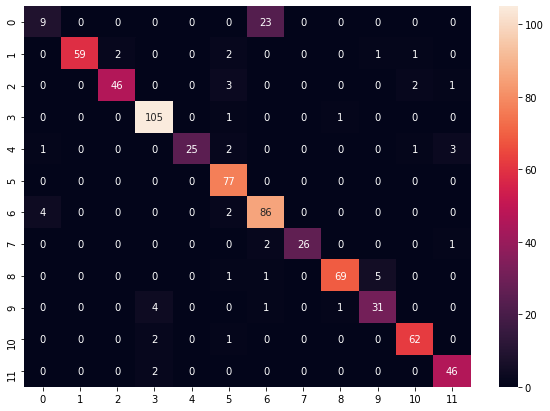

In [552]:
import seaborn as sns
df_cm = pd.DataFrame(cm, index = [i for i in np.arange(12)],
                     columns = [i for i in np.arange(12)])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, fmt='d')

The above model, named model2 fitted with Non-Blurred train data gives the best Test accuracy

### Visualize predictions for x_test[2], x_test[3], x_test[33], x_test[36], x_test[59] using the best model as above (with 90% accuracy). 

In [553]:
# Dictionary variable holding the one hot coded labels and actual values
y_labels

{0: 'Black-grass',
 1: 'Charlock',
 2: 'Cleavers',
 3: 'Common Chickweed',
 4: 'Common wheat',
 5: 'Fat Hen',
 6: 'Loose Silky-bent',
 7: 'Maize',
 8: 'Scentless Mayweed',
 9: 'Shepherds Purse',
 10: 'Small-flowered Cranesbill',
 11: 'Sugar beet'}

In [554]:
#Function to visualize image(non-blurred) and print actual and predicted label
def visualize_orig_img(i):
  print("Actual Label in one hot coded array: {}".format(y1_test[i]))
  lb_act = y1_test_final[i].astype(int)
  lb_pred = y1_pred[i].astype(int)
  print("Actual Label: {0} {1}".format(y1_test_final[i], y_labels[lb_act]) )
  print("Predicted Label: {0} {1}".format(y1_pred[i], y_labels[lb_pred]))
  plt.imshow(X1_test[i])


Actual Label in one hot coded array: [0 0 0 0 0 0 1 0 0 0 0 0]
Actual Label: 6 Loose Silky-bent
Predicted Label: 6 Loose Silky-bent


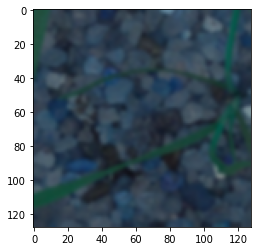

In [555]:
visualize_orig_img(2)

Actual Label in one hot coded array: [0 1 0 0 0 0 0 0 0 0 0 0]
Actual Label: 1 Charlock
Predicted Label: 1 Charlock


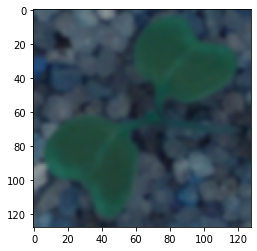

In [556]:
visualize_orig_img(3)

Actual Label in one hot coded array: [0 0 0 0 0 0 0 1 0 0 0 0]
Actual Label: 7 Maize
Predicted Label: 7 Maize


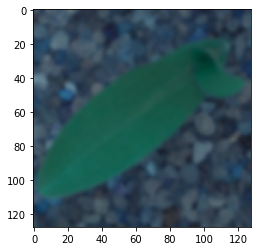

In [557]:
visualize_orig_img(33)

Actual Label in one hot coded array: [0 1 0 0 0 0 0 0 0 0 0 0]
Actual Label: 1 Charlock
Predicted Label: 1 Charlock


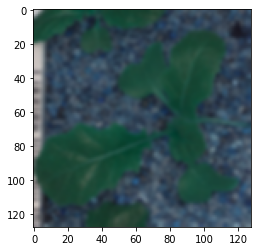

In [558]:
visualize_orig_img(36)

Actual Label in one hot coded array: [0 0 1 0 0 0 0 0 0 0 0 0]
Actual Label: 2 Cleavers
Predicted Label: 2 Cleavers


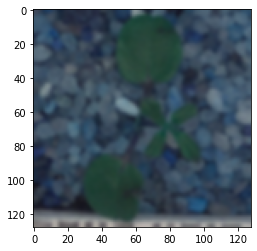

In [559]:
visualize_orig_img(59)